# Day 4 Tutorial: More Pandas

The following tutorial contains more examples of using Pandas. The notebook is adapted from Mobasher and Tan.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# File can be downloaded from:
# https://drive.google.com/file/d/1uT5ZiweJEGfGY_tudU-ToG1Crpw1Ez5I/view?usp=sharing
# and then uploaded to colab session storage and accessed like this:
# vstable = pd.read_csv('Video_Store.csv', index_col=0)

# Or, we can use the full path to the raw file:
vstable = pd.read_csv('https://drive.google.com/uc?export=download&id=1uT5ZiweJEGfGY_tudU-ToG1Crpw1Ez5I', index_col=0)
vstable.shape

(40, 6)

In [ ]:
vstable.head(10)

,Gender,Income,Age,Rentals,AvgPerVisit,Genre
ID,,,,,,
1,M,45000,25,27,2.5,Action
2,F,54000,33,12,3.4,Drama
3,F,32000,20,42,1.6,Comedy
4,F,59000,70,16,4.2,Drama
5,M,37000,35,25,3.2,Action
6,M,18000,20,33,1.7,Action
7,F,29000,45,19,3.8,Drama
8,M,74000,25,31,2.4,Action
9,M,38000,21,18,2.1,Comedy


In [ ]:
vstable.columns

Index(['Gender', 'Income', 'Age', 'Rentals', 'AvgPerVisit', 'Genre'], dtype='object')

In [ ]:
vstable.dtypes

Gender          object
Income           int64
Age              int64
Rentals          int64
AvgPerVisit    float64
Genre           object
dtype: object

#### Now we can convert columns to the appropriate type as necessary:

In [ ]:
vstable["Income"] = vstable["Income"].astype(float)
vstable.dtypes

Gender          object
Income         float64
Age              int64
Rentals          int64
AvgPerVisit    float64
Genre           object
dtype: object

In [ ]:
vstable.describe()

,Income,Age,Rentals,AvgPerVisit
count,40.000000,40.000000,40.000000,40.000000
mean,41500.000000,31.500000,26.175000,2.792500
std,22925.744123,12.752074,9.594035,0.833401
min,1000.000000,15.000000,11.000000,1.200000
25%,24750.000000,21.000000,19.000000,2.200000
50%,41000.000000,30.000000,25.000000,2.800000
75%,57500.000000,36.500000,32.250000,3.325000
max,89000.000000,70.000000,48.000000,4.600000


In [ ]:
min_sal = vstable["Income"].min()
max_sal = vstable["Income"].max()
print(min_sal, max_sal)

1000.0 89000.0


In [ ]:
# By default, the describe method only includes numeric columns.
vstable.describe(include="all")

,Gender,Income,Age,Rentals,AvgPerVisit,Genre
count,40,40.000000,40.000000,40.000000,40.000000,40
unique,2,NaN,NaN,NaN,NaN,3
top,M,NaN,NaN,NaN,NaN,Action
freq,21,NaN,NaN,NaN,NaN,15
mean,NaN,41500.000000,31.500000,26.175000,2.792500,NaN
std,NaN,22925.744123,12.752074,9.594035,0.833401,NaN
min,NaN,1000.000000,15.000000,11.000000,1.200000,NaN
25%,NaN,24750.000000,21.000000,19.000000,2.200000,NaN
50%,NaN,41000.000000,30.000000,25.000000,2.800000,NaN
75%,NaN,57500.000000,36.500000,32.250000,3.325000,NaN


### We can perform data transformations such as normalization by directly applying the operation to the Pandas Series.

In [ ]:
# min-max normalization maps the values between 0 and 1
norm_sal = (vstable["Income"] - min_sal) / (max_sal-min_sal)
print(norm_sal.head(10))

ID
1     0.500000
2     0.602273
3     0.352273
4     0.659091
5     0.409091
6     0.193182
7     0.318182
8     0.829545
9     0.420455
10    0.727273
Name: Income, dtype: float64


#### Z-Score Standardization on Age

In [ ]:
# z-score normalization (standardization) converts values to z-scores
# by subtracting the mean and dividing by the standard deviation.
# After standardization, the mean is 0 and the standard deviation is 1.
# The Z-score tells us how many standard deviations from the mean each observation is.
age_z = (vstable["Age"] - vstable["Age"].mean()) / vstable["Age"].std()
age_z.head(5)

ID
1   -0.509721
2    0.117628
3   -0.901814
4    3.019117
5    0.274465
Name: Age, dtype: float64

In [ ]:
vstable["Age-Std"] = age_z
vstable.head()

,Gender,Income,Age,Rentals,AvgPerVisit,Genre,Age-Std
ID,,,,,,,
1,M,45000.0,25,27,2.5,Action,-0.509721
2,F,54000.0,33,12,3.4,Drama,0.117628
3,F,32000.0,20,42,1.6,Comedy,-0.901814
4,F,59000.0,70,16,4.2,Drama,3.019117
5,M,37000.0,35,25,3.2,Action,0.274465


In [ ]:
# We can discretize a continuous attribute into a given number of ranges.
# The cut function evenly divides up the total range.
inc_bins = pd.cut(vstable.Income, 3)
print(inc_bins.value_counts())

(30333.333, 59666.667]    16
(912.0, 30333.333]        15
(59666.667, 89000.0]       9
Name: Income, dtype: int64


In [ ]:
# It's often more desirable to pick ranges so that each ends up with
# about the same number of examples, which is what qcut does.
inc_bins = pd.qcut(vstable.Income, 3)
print(inc_bins.value_counts())
print('\n')
print(inc_bins.head(10))

(999.999, 29000.0]    15
(49000.0, 89000.0]    13
(29000.0, 49000.0]    12
Name: Income, dtype: int64


ID
1     (29000.0, 49000.0]
2     (49000.0, 89000.0]
3     (29000.0, 49000.0]
4     (49000.0, 89000.0]
5     (29000.0, 49000.0]
6     (999.999, 29000.0]
7     (999.999, 29000.0]
8     (49000.0, 89000.0]
9     (29000.0, 49000.0]
10    (49000.0, 89000.0]
Name: Income, dtype: category
Categories (3, interval[float64]): [(999.999, 29000.0] < (29000.0, 49000.0] < (49000.0, 89000.0]]


In [ ]:
# We can also specify a particular set of quantiles and labels for them.
inc_bins = pd.qcut(vstable.Income, [0, .33, .66, 1], labels=["low", "mid", "high"])
inc_bins

ID
1      mid
2     high
3      mid
4     high
5      mid
6      low
7      low
8     high
9      mid
10    high
11     mid
12     low
13    high
14     mid
15    high
16     low
17     mid
18     low
19     low
20     low
21     mid
22     low
23     low
24    high
25     low
26    high
27    high
28    high
29     low
30     mid
31    high
32     mid
33     low
34     low
35    high
36     low
37    high
38     mid
39    high
40     low
Name: Income, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']

In [ ]:
# Concatenating a column onto an existing dataframe
# The name of the column will be whatever the name of the series is
print(inc_bins.name)
print('\n')
vs2 = pd.concat([vstable,inc_bins], axis=1)
vs2

Income




,Gender,Income,Age,Rentals,AvgPerVisit,Genre,Age-Std,Income
ID,,,,,,,,
1,M,45000.0,25,27,2.5,Action,-0.509721,mid
2,F,54000.0,33,12,3.4,Drama,0.117628,high
3,F,32000.0,20,42,1.6,Comedy,-0.901814,mid
4,F,59000.0,70,16,4.2,Drama,3.019117,high
5,M,37000.0,35,25,3.2,Action,0.274465,mid
6,M,18000.0,20,33,1.7,Action,-0.901814,low
7,F,29000.0,45,19,3.8,Drama,1.058651,low
8,M,74000.0,25,31,2.4,Action,-0.509721,high
9,M,38000.0,21,18,2.1,Comedy,-0.823395,mid


In [ ]:
# Or, we can modify a dataframe in place and specify the name of the new column.
vstable["inc-bins"] = inc_bins
vstable

,Gender,Income,Age,Rentals,AvgPerVisit,Genre,Age-Std,inc-bins
ID,,,,,,,,
1,M,45000.0,25,27,2.5,Action,-0.509721,mid
2,F,54000.0,33,12,3.4,Drama,0.117628,high
3,F,32000.0,20,42,1.6,Comedy,-0.901814,mid
4,F,59000.0,70,16,4.2,Drama,3.019117,high
5,M,37000.0,35,25,3.2,Action,0.274465,mid
6,M,18000.0,20,33,1.7,Action,-0.901814,low
7,F,29000.0,45,19,3.8,Drama,1.058651,low
8,M,74000.0,25,31,2.4,Action,-0.509721,high
9,M,38000.0,21,18,2.1,Comedy,-0.823395,mid


### Normalization

In [ ]:
# Pulling out a subset of columns and standardizing
vs_numeric = vstable[["Age","Income","Rentals","AvgPerVisit"]]
vs_num_std = (vs_numeric - vs_numeric.mean()) / vs_numeric.std()
vs_num_std.head(10)

,Age,Income,Rentals,AvgPerVisit
ID,,,,
1,-0.509721,0.152667,0.085991,-0.350971
2,0.117628,0.545239,-1.477480,0.728941
3,-0.901814,-0.414381,1.649462,-1.430883
4,3.019117,0.763334,-1.060555,1.688862
5,0.274465,-0.196286,-0.122472,0.488960
6,-0.901814,-1.025049,0.711379,-1.310893
7,1.058651,-0.545239,-0.747860,1.208901
8,-0.509721,1.417620,0.502917,-0.470962
9,-0.823395,-0.152667,-0.852092,-0.830932


In [ ]:
# Alternately, we can define a function to do standardization
def standardize(x):
  return (x - x.mean()) / x.std()

vs_num_std = vs_numeric.apply(standardize)

# Or we can use a lambda function
vs_num_std = vs_numeric.apply(lambda x: (x - x.mean()) / x.std())
vs_num_std.head()

,Age,Income,Rentals,AvgPerVisit
ID,,,,
1,-0.509721,0.152667,0.085991,-0.350971
2,0.117628,0.545239,-1.477480,0.728941
3,-0.901814,-0.414381,1.649462,-1.430883
4,3.019117,0.763334,-1.060555,1.688862
5,0.274465,-0.196286,-0.122472,0.488960


In [ ]:
# We can add a condition so that the lambda function only applies to numeric columns.
zscore = lambda x: ((x - x.mean()) / x.std()) if (x.dtypes==np.float64 or x.dtypes==np.int64) else x
vs_std = vstable.copy()
vs_std.apply(zscore).head()

### Groupby

In [ ]:
vstable.head()

,Gender,Income,Age,Rentals,AvgPerVisit,Genre,Age-Std,inc-bins
ID,,,,,,,,
1,M,45000.0,25,27,2.5,Action,-0.509721,mid
2,F,54000.0,33,12,3.4,Drama,0.117628,high
3,F,32000.0,20,42,1.6,Comedy,-0.901814,mid
4,F,59000.0,70,16,4.2,Drama,3.019117,high
5,M,37000.0,35,25,3.2,Action,0.274465,mid


In [ ]:
# Finding the average within a category
# (Notice that only numeric columns are retained)
vstable.groupby("Gender").mean()

,Income,Age,Rentals,AvgPerVisit,Age-Std
Gender,,,,,
F,40631.578947,33.631579,27.684211,2.968421,0.167155
M,42285.714286,29.571429,24.809524,2.633333,-0.151236


In [ ]:
vstable.groupby("Genre").mean()

,Income,Age,Rentals,AvgPerVisit,Age-Std
Genre,,,,,
Action,32666.666667,24.066667,29.933333,2.466667,-0.582912
Comedy,45000.000000,31.916667,25.666667,2.641667,0.032674
Drama,48461.538462,39.692308,22.307692,3.307692,0.642429


In [ ]:
vstable.groupby("Genre").describe()

Income                              ...   Age-Std                    
        count          mean           std  ...       50%       75%       max
Genre                                      ...                              
Action   15.0  32666.666667  21562.754484  ... -0.509721 -0.352884  0.274465
Comedy   12.0  45000.000000  29073.574381  ... -0.313674  1.137070  1.921256
Drama    13.0  48461.538462  15119.608596  ...  0.352884  1.058651  3.019117

[3 rows x 40 columns]

In [ ]:
# Sometimes for legibility, it's helpful to transpose the rows and columns.
vstable.groupby("Genre").describe().T

Genre                    Action        Comedy         Drama
Income      count     15.000000     12.000000     13.000000
            mean   32666.666667  45000.000000  48461.538462
            std    21562.754484  29073.574381  15119.608596
            min     6000.000000   1000.000000  25000.000000
            25%    17000.000000  27750.000000  41000.000000
            50%    26000.000000  43500.000000  47000.000000
            75%    43000.000000  68000.000000  59000.000000
            max    74000.000000  89000.000000  79000.000000
Age         count     15.000000     12.000000     13.000000
            mean      24.066667     31.916667     39.692308
            std        6.374802     14.650215     11.933040
            min       16.000000     15.000000     22.000000
            25%       19.000000     20.750000     33.000000
            50%       25.000000     27.500000     36.000000
            75%       27.000000     46.000000     45.000000
            max       35.000000     56.000000     70.000000
Rentals     count     15.000000     12.000000     13.000000
            mean      29.933333     25.666667     22.307692
            std        7.591976     10.662878      9.672854
            min       17.000000     12.000000     11.000000
            25%       25.500000     17.250000     16.000000
            50%       29.000000     23.500000     21.000000
            75%       35.000000     34.500000     24.000000
            max       43.000000     42.000000     48.000000
AvgPerVisit count     15.000000     12.000000     13.000000
            mean       2.466667      2.641667      3.307692
            std        0.776132      0.967150      0.504086
            min        1.400000      1.200000      2.300000
            25%        1.950000      1.975000      3.100000
            50%        2.400000      2.600000      3.300000
            75%        2.800000      3.300000      3.600000
            max        4.600000      4.100000      4.200000
Age-Std     count     15.000000     12.000000     13.000000
            mean      -0.582912      0.032674      0.642429
            std        0.499903      1.148850      0.935772
            min       -1.215489     -1.293907     -0.744977
            25%       -0.980233     -0.843000      0.117628
            50%       -0.509721     -0.313674      0.352884
            75%       -0.352884      1.137070      1.058651
            max        0.274465      1.921256      3.019117

### Counting Things

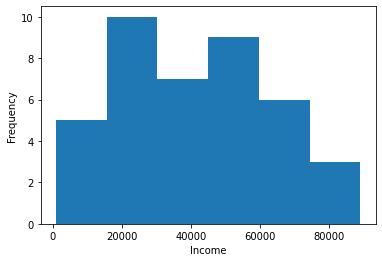

In [ ]:
vstable["Income"].plot(kind="hist", bins=6)
plt.xlabel('Income')
plt.show()


In [ ]:
# value_counts computes how many items are in each category
vstable["Genre"].value_counts()

Action    15
Drama     13
Comedy    12
Name: Genre, dtype: int64

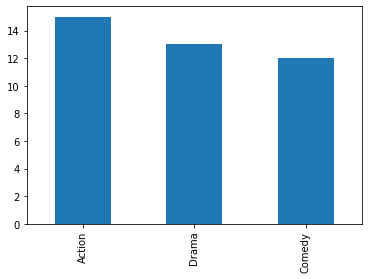

In [ ]:
# We can easily visualize this as a bar graph
vstable["Genre"].value_counts().plot(kind='bar')
plt.show()

M    0.525
F    0.475
Name: Gender, dtype: float64



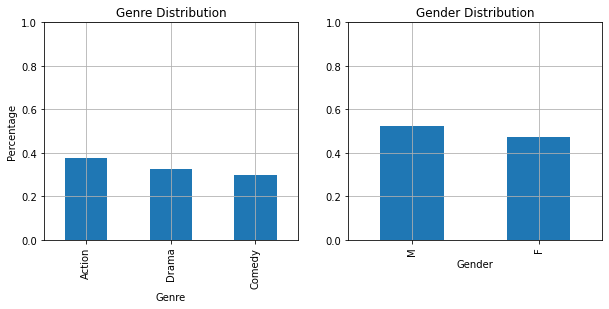

In [ ]:
# Dividing by the total to get percents
num_rows = vstable["Genre"].count()
temp1 = vstable["Genre"].value_counts() / num_rows
temp2 = vstable["Gender"].value_counts() / num_rows
print(temp2)
print()

fig = plt.figure(figsize=(10,4))

# Set up subplots that will be 1 x 2
ax1 = fig.add_subplot(121)
temp1.plot(kind='bar', grid=True)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Percentage')
ax1.set_title("Genre Distribution")
ax1.set_ylim(0, 1)

ax2 = fig.add_subplot(122)
temp2.plot(kind='bar', grid=True)
ax2.set_xlabel('Gender')
# For side-by-side graphs, no need to label y axis twice
# ax2.set_ylabel('Percentage')
ax2.set_title("Gender Distribution")
# For side-by-side graphs, make sure y-axis has same range
ax2.set_ylim(0, 1)

plt.show()

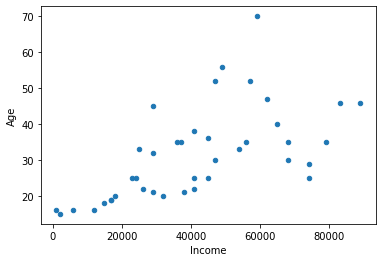

In [ ]:
# Scatter plot
vstable.plot(x="Income", y="Age", kind="scatter")
plt.show()

### Grouping by multiple columns, cross-tabs

In [ ]:
# Grouping by Genre, and, within Genre, group by Gender
vstable.groupby(["Genre","Gender"]).count()

Income  Age  Rentals  AvgPerVisit  Age-Std  inc-bins
Genre  Gender                                                      
Action F            5    5        5            5        5         5
       M           10   10       10           10       10        10
Comedy F            6    6        6            6        6         6
       M            6    6        6            6        6         6
Drama  F            8    8        8            8        8         8
       M            5    5        5            5        5         5

In [ ]:
# More useful: just show the counts from one column
vstable.groupby(["Genre","Gender"])["Gender"].count()

Genre   Gender
Action  F          5
        M         10
Comedy  F          6
        M          6
Drama   F          8
        M          5
Name: Gender, dtype: int64

In [ ]:
# Pandas an easier way to accomplish this with crosstab,
# which counts items based on two factors
gg = pd.crosstab(vstable["Genre"], vstable["Gender"])
gg

Gender,F,M
Genre,,
Action,5,10
Comedy,6,6
Drama,8,5


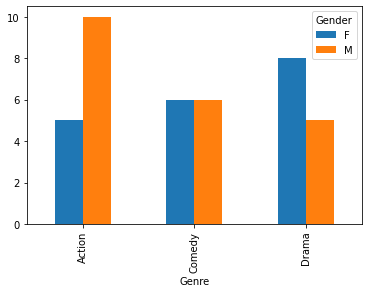

In [ ]:
# We can plot a crosstab as a grouped bar chart
gg.plot(kind="bar")
plt.show()


In [ ]:
# We could add a new column
gg["percent_female"] = gg["F"]/(gg["F"]+gg["M"])
gg

Gender,F,M,percent_female
Genre,,,
Action,5,10,0.333333
Comedy,6,6,0.500000
Drama,8,5,0.615385


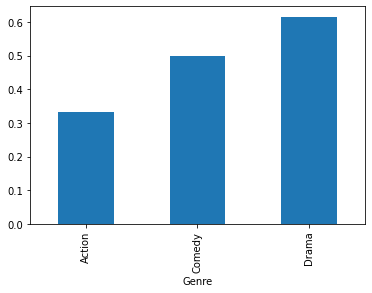

In [ ]:
gg["percent_female"].plot(kind="bar")
plt.show()

#### Suppose that we would like to find all "good cutomers," e.g., those with Rentals value of >= 30:

In [ ]:
good_cust = vstable[vstable.Rentals>=30]
good_cust

,Gender,Income,Age,Rentals,AvgPerVisit,Genre,Age-Std,inc-bins
ID,,,,,,,,
3,F,32000.0,20,42,1.6,Comedy,-0.901814,mid
6,M,18000.0,20,33,1.7,Action,-0.901814,low
8,M,74000.0,25,31,2.4,Action,-0.509721,high
11,F,41000.0,22,48,2.3,Drama,-0.744977,mid
15,M,68000.0,30,36,2.7,Comedy,-0.117628,high
18,F,6000.0,16,39,1.8,Action,-1.215489,low
19,F,24000.0,25,41,3.1,Comedy,-0.509721,low
23,F,2000.0,15,30,2.5,Comedy,-1.293907,low
26,F,56000.0,35,40,2.6,Action,0.274465,high


In [ ]:
print("Good Customers:\n", good_cust.describe())
print("\n All Customers:\n", vstable.describe())

Good Customers:
              Income        Age    Rentals  AvgPerVisit    Age-Std
count     14.000000  14.000000  14.000000    14.000000  14.000000
mean   37000.000000  24.428571  37.000000     2.507143  -0.554532
std    25404.421178   8.599770   5.349335     0.818502   0.674382
min     2000.000000  15.000000  30.000000     1.600000  -1.293907
25%    17250.000000  19.250000  32.250000     1.875000  -0.960628
50%    30500.000000  21.500000  36.500000     2.350000  -0.784186
75%    60500.000000  28.000000  40.750000     2.675000  -0.274465
max    74000.000000  47.000000  48.000000     4.600000   1.215489

 All Customers:
              Income        Age    Rentals  AvgPerVisit       Age-Std
count     40.000000  40.000000  40.000000    40.000000  4.000000e+01
mean   41500.000000  31.500000  26.175000     2.792500  1.665335e-17
std    22925.744123  12.752074   9.594035     0.833401  1.000000e+00
min     1000.000000  15.000000  11.000000     1.200000 -1.293907e+00
25%    24750.000000  21.00

#### Creating dummy variables (one-hot encoding) and converting to standard spreadsheet format (all numeric attributes)

In [ ]:
gender_bin = pd.get_dummies(vstable["Gender"], prefix="Gender")
gender_bin.head()

,Gender_F,Gender_M
ID,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [ ]:
vs_ssf = pd.get_dummies(vstable)
vs_ssf.head(10)

,Income,Age,Rentals,AvgPerVisit,Age-Std,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama,inc-bins_low,inc-bins_mid,inc-bins_high
ID,,,,,,,,,,,,,
1,45000.0,25,27,2.5,-0.509721,0,1,1,0,0,0,1,0
2,54000.0,33,12,3.4,0.117628,1,0,0,0,1,0,0,1
3,32000.0,20,42,1.6,-0.901814,1,0,0,1,0,0,1,0
4,59000.0,70,16,4.2,3.019117,1,0,0,0,1,0,0,1
5,37000.0,35,25,3.2,0.274465,0,1,1,0,0,0,1,0
6,18000.0,20,33,1.7,-0.901814,0,1,1,0,0,1,0,0
7,29000.0,45,19,3.8,1.058651,1,0,0,0,1,1,0,0
8,74000.0,25,31,2.4,-0.509721,0,1,1,0,0,0,0,1
9,38000.0,21,18,2.1,-0.823395,0,1,0,1,0,0,1,0


In [ ]:
vs_ssf.describe(include="all")

,Income,Age,Rentals,AvgPerVisit,Age-Std,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama,inc-bins_low,inc-bins_mid,inc-bins_high
count,40.000000,40.000000,40.000000,40.000000,4.000000e+01,40.000000,40.000000,40.00000,40.000000,40.000000,40.00000,40.000000,40.000000
mean,41500.000000,31.500000,26.175000,2.792500,1.665335e-17,0.475000,0.525000,0.37500,0.300000,0.325000,0.37500,0.275000,0.350000
std,22925.744123,12.752074,9.594035,0.833401,1.000000e+00,0.505736,0.505736,0.49029,0.464095,0.474342,0.49029,0.452203,0.483046
min,1000.000000,15.000000,11.000000,1.200000,-1.293907e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,24750.000000,21.000000,19.000000,2.200000,-8.233955e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,41000.000000,30.000000,25.000000,2.800000,-1.176279e-01,0.000000,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,57500.000000,36.500000,32.250000,3.325000,3.920931e-01,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000
max,89000.000000,70.000000,48.000000,4.600000,3.019117e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
# Min-max normalization
vs_norm = (vs_ssf - vs_ssf.min()) / (vs_ssf.max()-vs_ssf.min())
vs_norm.head(10)

,Income,Age,Rentals,AvgPerVisit,Age-Std,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama,inc-bins_low,inc-bins_mid,inc-bins_high
ID,,,,,,,,,,,,,
1,0.500000,0.181818,0.432432,0.382353,0.181818,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.602273,0.327273,0.027027,0.647059,0.327273,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.352273,0.090909,0.837838,0.117647,0.090909,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.659091,1.000000,0.135135,0.882353,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.409091,0.363636,0.378378,0.588235,0.363636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
6,0.193182,0.090909,0.594595,0.147059,0.090909,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.318182,0.545455,0.216216,0.764706,0.545455,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8,0.829545,0.181818,0.540541,0.352941,0.181818,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
9,0.420455,0.109091,0.189189,0.264706,0.109091,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Correlation
vs_ssf.corr()

,Income,Age,Rentals,AvgPerVisit,Age-Std,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama,inc-bins_low,inc-bins_mid,inc-bins_high
Income,1.000000,0.613769,-0.262472,0.468565,0.613769,-0.036490,0.036490,-0.302256,0.101217,0.213388,-0.797271,-0.016077,0.824278
Age,0.613769,1.000000,-0.547113,0.629107,1.000000,0.161022,-0.161022,-0.457274,0.021663,0.451453,-0.535195,-0.033349,0.574441
Rentals,-0.262472,-0.547113,1.000000,-0.206353,-0.547113,0.151535,-0.151535,0.307303,-0.035128,-0.283266,0.209184,-0.040928,-0.174007
AvgPerVisit,0.468565,0.629107,-0.206353,1.000000,0.629107,0.203343,-0.203343,-0.306701,-0.119992,0.434413,-0.350627,-0.130462,0.478017
Age-Std,0.613769,1.000000,-0.547113,0.629107,1.000000,0.161022,-0.161022,-0.457274,0.021663,0.451453,-0.535195,-0.033349,0.574441
Gender_F,-0.036490,0.161022,0.151535,0.203343,0.161022,1.000000,-1.000000,-0.219744,0.032774,0.195067,0.090483,-0.249464,0.141696
Gender_M,0.036490,-0.161022,-0.151535,-0.203343,-0.161022,-1.000000,1.000000,0.219744,-0.032774,-0.195067,-0.090483,0.249464,-0.141696
Genre_Action,-0.302256,-0.457274,0.307303,-0.306701,-0.457274,-0.219744,0.219744,1.000000,-0.507093,-0.537484,0.360000,-0.130107,-0.243599
Genre_Comedy,0.101217,0.021663,-0.035128,-0.119992,0.021663,0.032774,-0.032774,-0.507093,1.000000,-0.454257,-0.056344,-0.158832,0.205879
Genre_Drama,0.213388,0.451453,-0.283266,0.434413,0.451453,0.195067,-0.195067,-0.537484,-0.454257,1.000000,-0.316978,0.289883,0.050358


#### The new table can be written into a file using to_csv method:

In [ ]:
vs_norm.to_csv("Video_Store_Numeric.csv", float_format="%1.2f")

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


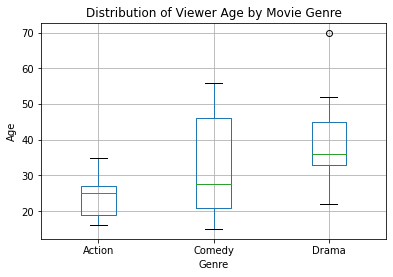

In [ ]:
# Boxplots
vstable.boxplot(by='Genre', column='Age') # by is the groupby column, column is the y axis value column name
plt.ylabel('Age')
plt.title('Distribution of Viewer Age by Movie Genre')
plt.suptitle('') # Get rid of unnecessary extra title
plt.show()